<a href="https://colab.research.google.com/github/sumitx/PYTH225_Homework/blob/master/Sumit_Pal_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
This project analyses video games sales over the past several years to uncover trends in Genre popularity on a global basis 

# Hypothesis
Due to the rise of eSports, the expanded depth and breadth of open world games, and general media buzz the highest number of video games sales over time should trend towards Shooters and Action RPGs

#Data Description
The data for this project was found through a user uploaded set on Kaggle. I went this data source since it was the most recently updated set, so it should provide the accurate publically available data. 

**Note**: The data set I've used here is actually built upon an original data set, which is no longer maintained. The appropriate credit is given on Kaggle

#Data Dictionary
Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

Critic_score - Aggregate score compiled by Metacritic staff

Criticcount - The number of critics used in coming up with the critic score 

User_score - Score by Metacritic's subscribers

Usercount - Number of users who gave the userscore

Developer - Party responsible for creating the game

Rating - The ESRB ratings

Source: https://www.kaggle.com/mohalim/video-games-sales

In [0]:
#Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Once we've imported our libaries, we should begin by reading our data in. The file is available locally as a CSV

In [237]:
#Read in the data
vgsales = pd.read_csv('vgsales.csv')
game_sales = vgsales.copy()
print('Data loaded successfully!')

Data loaded successfully!


Next we need to cleanup our data set

We start by removing columns we don't need. Then we replace values that are None with more appropriate placeholders

In [0]:
'''
Cleaning up data
'''
#Remove columns we don't need
game_sales.drop(columns=['Critic_Count', 'Critic_Score', 'User_Score', 'User_Count', 'Rating', 'Publisher'], inplace=True)

# Set max_columns to the total num of columns we have, so they'll display
pd.set_option('display.max_columns', len(game_sales.columns))

#Remove null values
game_sales['NA_Sales'].fillna(0, inplace=True)
game_sales['EU_Sales'].fillna(0, inplace=True)
game_sales['JP_Sales'].fillna(0, inplace=True)
game_sales['Other_Sales'].fillna(0, inplace=True)
game_sales['Global_Sales'].fillna(0, inplace=True)
game_sales['Genre'].fillna("Unknown", inplace=True)
game_sales['Developer'].fillna("Unknown", inplace=True)

#For our dataset we need to know the year of release, so lets select all entries with a year provided
game_sales = game_sales[pd.notnull(game_sales['Year_of_Release'])]

#Cast years to ints
game_sales['Year_of_Release'] = game_sales['Year_of_Release'].astype('int64')

Next let's filter down the data that we have, so we can analyze it more closely

In [288]:
#Grab titles from only the most recent years:
#Data set jumps form 2017 to 2020, so going to include a few years prior
game_sales = game_sales[(game_sales['Year_of_Release'] >= 2013) & (game_sales['Year_of_Release'] <= 2020)]

#Check for any duplicate rows
num_dup_titles = game_sales.duplicated(subset=['Name']).sum()
print(f"There are {num_dup_titles} duplicate titles")

There are 971 duplicate titles


There are duplicates! This was initially a concern until I considered that it might actually be okay.

When we group by year and genre, all platforms will be taken into consideration at the end (Xbox, PS4, etc); therefore, we did not need to do further grouping or any deduping in this instance

Dedupliction would only have removed valuable sales data

In [291]:
#Combined Dataset
#This is here to serve as a reference for the conclusions we draw later and to help verify numbers on our graphs

#Break down the results by total units sold by year and genre
sales_overall = game_sales.groupby(['Year_of_Release', "Genre"])['Global_Sales'].sum()
print(sales_overall)


Year_of_Release  Genre       
2013.0           Action          98.48
                 Adventure        5.02
                 Fighting         6.44
                 Misc            25.01
                 Platform        23.49
                 Puzzle           0.95
                 Racing          12.27
                 Role-Playing    29.21
                 Shooter         61.51
                 Simulation       3.37
                 Sports          37.74
                 Strategy         5.37
2014.0           Action          93.59
                 Adventure        5.41
                 Fighting        15.83
                 Misc            18.56
                 Platform         8.78
                 Puzzle           1.49
                 Racing          16.64
                 Role-Playing    44.11
                 Shooter         63.62
                 Simulation       5.59
                 Sports          43.29
                 Strategy         0.99
2015.0           Action          7

# Analysis

Let's now plot the data per year, so we can identify any trends

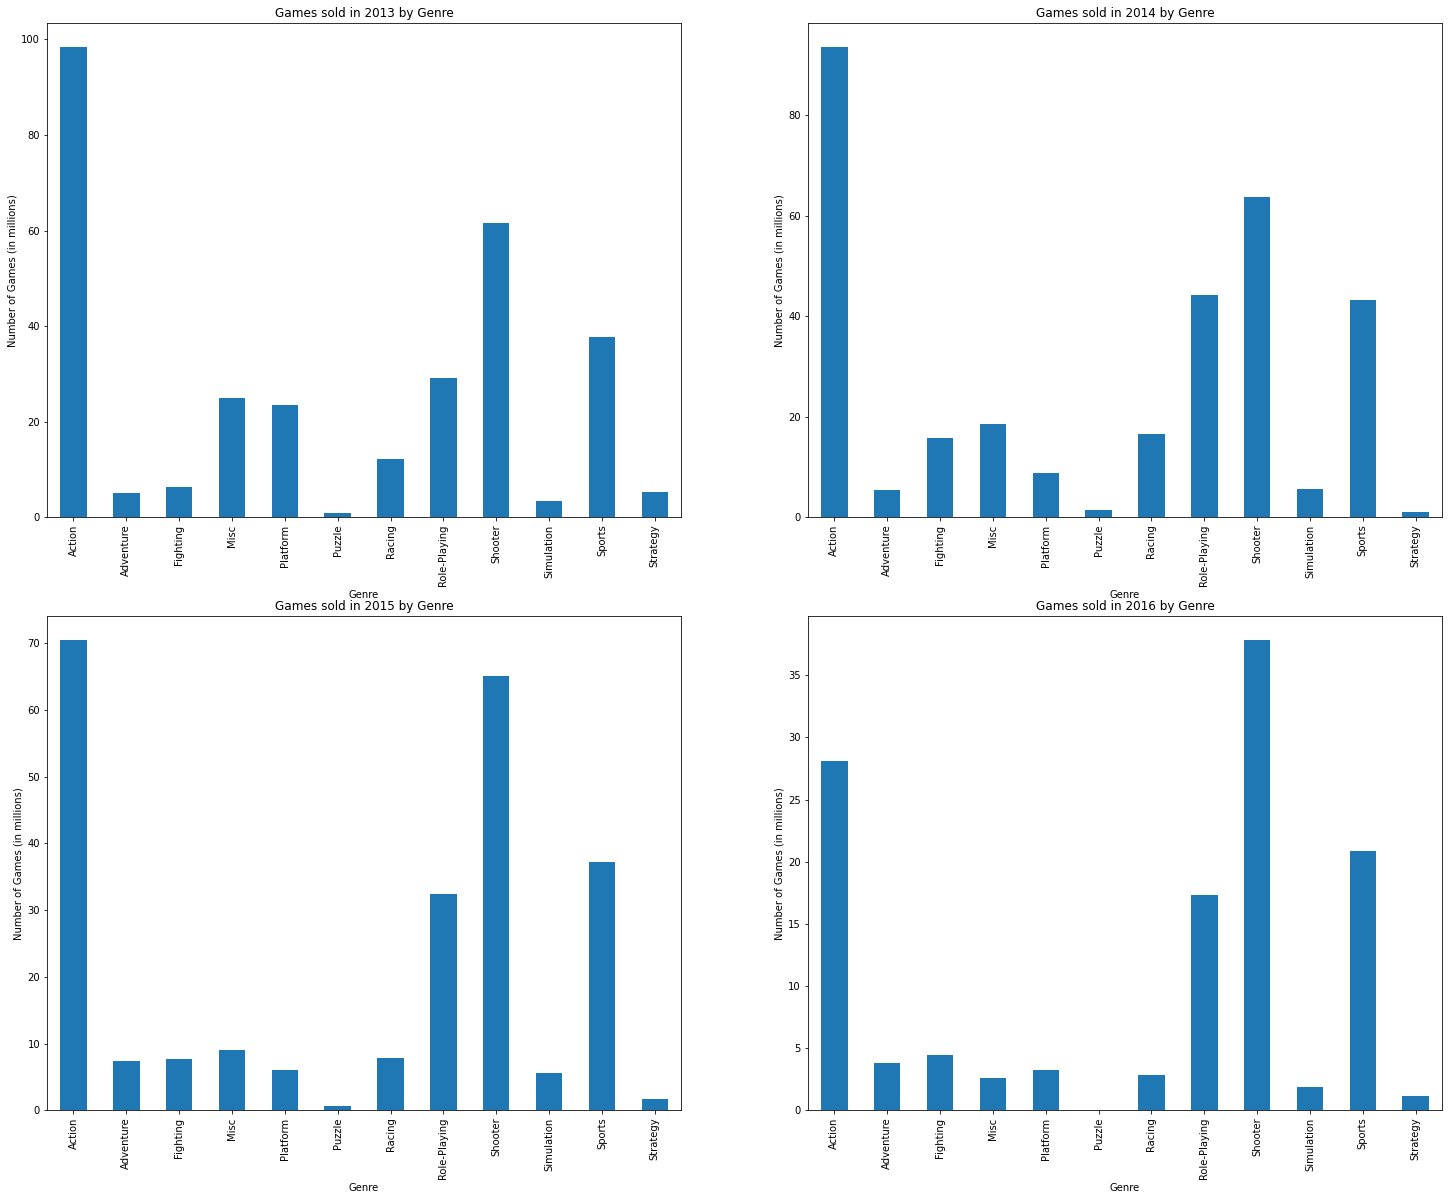

In [281]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))

sales_2013 = game_sales[game_sales['Year_of_Release'] == 2013].groupby("Genre")['Global_Sales'].sum()
sales_2013.plot(ax=axes[0,0], kind='bar')
axes[0, 0].set_title('Games sold in 2013 by Genre')
axes[0, 0].set_ylabel('Number of Games (in millions)')

sales_2014 = game_sales[game_sales['Year_of_Release'] == 2014].groupby("Genre")['Global_Sales'].sum()
sales_2014.plot(ax=axes[0,1], kind='bar')
axes[0, 1].set_title('Games sold in 2014 by Genre')
axes[0, 1].set_ylabel('Number of Games (in millions)')

sales_2015 = game_sales[game_sales['Year_of_Release'] == 2015].groupby("Genre")['Global_Sales'].sum()
sales_2015.plot(ax=axes[1,0], kind='bar')
axes[1, 0].set_title('Games sold in 2015 by Genre')
axes[1, 0].set_ylabel('Number of Games (in millions)')

sales_2016 = game_sales[game_sales['Year_of_Release'] == 2016].groupby("Genre")['Global_Sales'].sum()
sales_2016.plot(ax=axes[1,1],kind='bar')
axes[1, 1].set_title('Games sold in 2016 by Genre')
axes[1, 1].set_ylabel('Number of Games (in millions)')

plt.show()

**Thoughts**:

Based on the data trends we're seeing since 2013, it appears that shooters has seen the most growth in sales, followed by steady increases to RPGs 

We can also notice that during this time the number of units sold under the Action genre is on a steady decline

The year 2016 is a bit of a rocky point because sales are down across the board, but the trends still seem to hold

**Data outliers:**

It looks like since 2017 our data becomes very inconsistent; therefore, I am not taking these results into consideration for our conclusion. 

For 2017 with only two genres represented and figures below 1 million the data doesn't seem to be very meaningful. This is magnified in the case of 2020 where only a single genre is captured

Text(0, 0.5, 'Number of Games (in millions)')

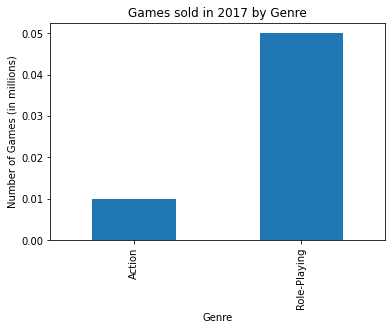

In [270]:
sales_2017 = game_sales[game_sales['Year_of_Release'] == 2017].groupby("Genre")['Global_Sales'].sum()
sales_2017.plot(kind='bar')
plt.title('Games sold in 2017 by Genre')
plt.ylabel('Number of Games (in millions)')

Text(0, 0.5, 'Number of Games (in millions)')

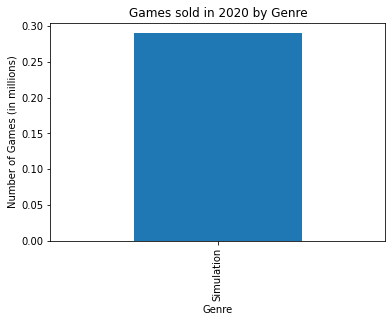

In [271]:
sales_2020 = game_sales[game_sales['Year_of_Release'] == 2020].groupby("Genre")['Global_Sales'].sum()
sales_2020.plot(kind='bar')
plt.title('Games sold in 2020 by Genre')
plt.ylabel('Number of Games (in millions)')

# Conclusion

Based on the year over year data, and without taking into consideration any of the data anomalies, it appears as thought my hypothesis was correct in that Shoorters and RPGs have grown over time. 

I was not expecting Action games to have as many sales as they did, but this could be due to the classification of games becoming more granular overtime, but also a shift in consumer appetite 

It was rather unfortuante that the dataset which Kaggle reported as being updated about one month ago 3/2020 doesn't include more recent data to draw conclusions from though

Future steps here would be to try to incorporate more recent data, so we can get a complete picture on how these trends have evolved over time